# Feature Engineering

1. Missing data
2. Feature Normalization
3. Categorical Encoding
4. Transformations
5. Discretization
6. Outliers
7. Optional: Date and Time

---
## 1. Missing data

In [1]:
import pylab
import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [2]:
#!gdown "160gAZCXP4ru26txQo-MYJISet-ASMNR9"

titanic = pd.read_csv('titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data0 = titanic.copy()
data0

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data0.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
print(f'data0.dropna().shape[0]: {data0.dropna().shape[0]}')
print(f'float(data0.shape[0]): {float(data0.shape[0])}')
print(f'Percentage of data with missing values: {data0.dropna().shape[0]/float(data0.shape[0])}')
data0.shape

data0.dropna().shape[0]: 183
float(data0.shape[0]): 891.0
Percentage of data with missing values: 0.2053872053872054


(891, 12)

In [6]:
data1 = titanic.copy()

In [7]:
data1.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
data1.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**TODO:** `Age` is a continuous variable. First, we will check the distribution of `age` variable.

In [10]:
# Basic statistics of Age feature
data1['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [11]:
# Cheking other dispersion measures
myrange = data1['Age'].max() - data1['Age'].min()
print(f"The age range is {myrange}")
q1 = np.percentile(data1['Age'], 25)
q3 = np.percentile(data1['Age'], 75)
iqr = q3 - q1
print(f"IQR = {iqr}")
print("Values to detect outliers (based in quartiles):")
maximum = q3 + 1.5 * iqr
minimum = q1 + 1.5 * iqr
print(f"Minimum = {minimum}")
print(f"Maximum = {maximum}")

The age range is 79.58
IQR = nan
Values to detect outliers (based in quartiles):
Minimum = nan
Maximum = nan


In [12]:
# Calculations are nan because of missing values!!!
# Calculating droping missing values
myrange = data1['Age'].max() - data1['Age'].min()
print(f"The age range is {myrange}")
q1 = np.percentile(data1['Age'].dropna(), 25)
q3 = np.percentile(data1['Age'].dropna(), 75)
iqr = q3 - q1
print(f"IQR = {iqr}")
print("Values to detect outliers (based in quartiles):")
maximum = q3 + 1.5 * iqr
minimum = q1 - 1.5 * iqr
print(f"Minimum = {minimum}")
print(f"Maximum = {maximum}")

The age range is 79.58
IQR = 17.875
Values to detect outliers (based in quartiles):
Minimum = -6.6875
Maximum = 64.8125


In [13]:
# Checking missing values
data1['Age'].isna().mean()

0.19865319865319866

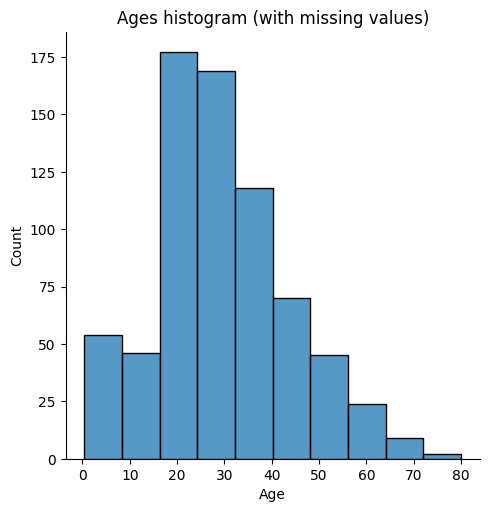

In [14]:
# Plotting an histogram

sns.displot(data=data1, x='Age', kind='hist', bins=10).set(title='Ages histogram (with missing values)')
plt.show()

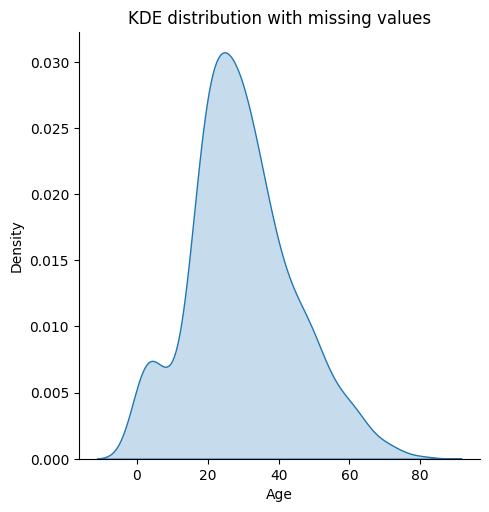

In [15]:
# Plotting kde
sns.displot(data=data1, x='Age',kind='kde', fill=True).set(title='KDE distribution with missing values')
plt.show()

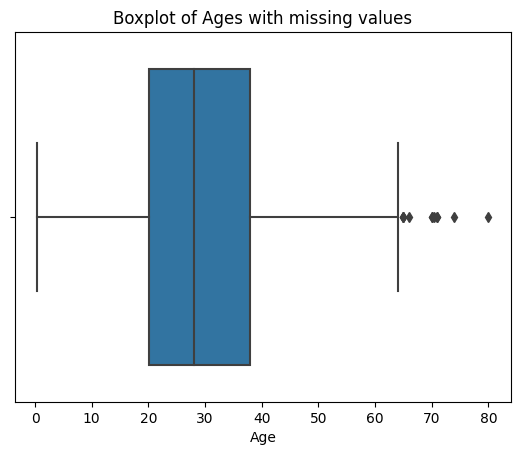

In [16]:
# Boxplot
sns.boxplot(data=data1, x='Age').set(title='Boxplot of Ages with missing values')
plt.show()

**TODO:** We can see that the `age` distribution is skewed. So, we will use the median imputation.

In [17]:
# Imputation using median
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy='mean')
mean_imputer.fit(data1['Age'].values.reshape(-1,1))
data1['Age'] = mean_imputer.transform(data1['Age'].values.reshape(-1,1))
data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [18]:
data1['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [19]:
# Now, the median and the mean are the same!
# Standard deviation is less
# Checking other deviation parameters
myrange = data1['Age'].max() - data1['Age'].min()
print(f"The age range is {myrange}")
q1 = np.percentile(data1['Age'], 25)
q3 = np.percentile(data1['Age'], 75)
iqr = q3 - q1
print(f"IQR = {iqr}")
print("Values to detect outliers (based in quartiles):")
maximum = q3 + 1.5 * iqr
minimum = q1 - 1.5 * iqr
print(f"Minimum = {minimum}")
print(f"Maximum = {maximum}")

The age range is 79.58
IQR = 13.0
Values to detect outliers (based in quartiles):
Minimum = 2.5
Maximum = 54.5


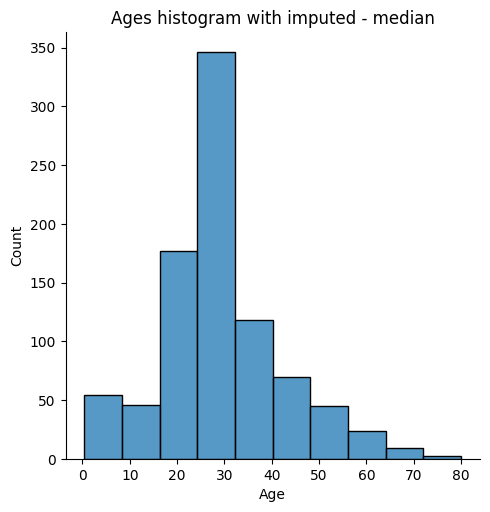

In [20]:
# New histogram
sns.displot(data=data1, kind='hist', x='Age', bins=10).set(title='Ages histogram with imputed - median')
plt.show()

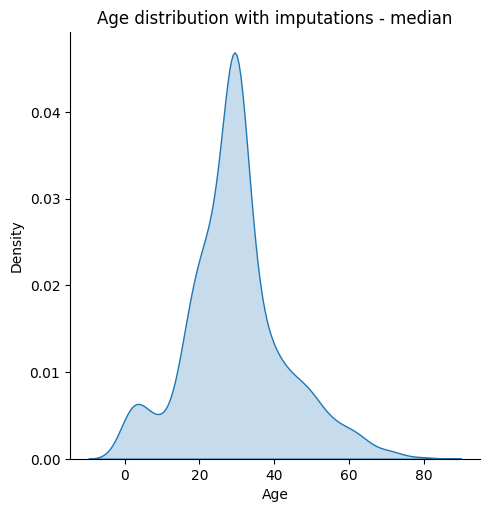

In [21]:
# Plotting kde
sns.displot(data=data1, x='Age', kind='kde', fill=True).set(title='Age distribution with imputations - median')
plt.show()

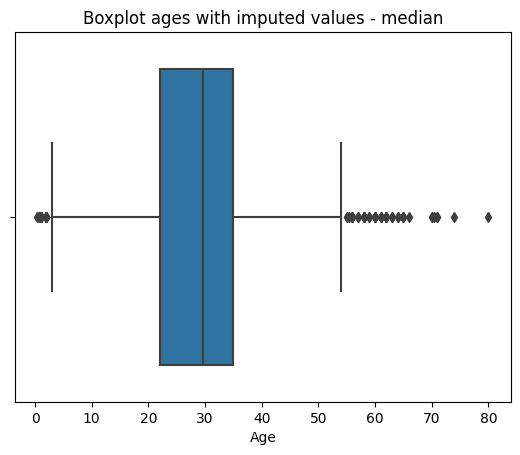

In [22]:
# Boxplot
sns.boxplot(data=data1, x='Age').set(title='Boxplot ages with imputed values - median')
plt.show()

In [23]:
# Lets check the Age column stats now
data1['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

---
## 2. Feature Normalization

In [24]:
data2 = titanic.copy()
median = data2.Age.median()
display(median)
data2['Age'] = data2['Age'].fillna(median)
data2.head()

28.0

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**TODO:** We are going to normalize the Age in two ways using MinMax Scaler and Standard Scaler

In [25]:
# Using minmax
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [26]:
# First we fit
minmax_scaler = MinMaxScaler(feature_range=(0, 1), clip=True)
minmax_scaler.fit(data2["Age"].values.reshape(-1,1))
minmax_scaler

MinMaxScaler(clip=True)

In [27]:
# Now, we transform
data2["Age_minmax"] = minmax_scaler.transform(data2['Age'].values.reshape(-1,1))
data2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_minmax
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.271174
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.472229
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.321438
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.434531
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.434531
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.334004
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0.233476
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,0.346569
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0.321438


In [28]:
data2[["Age","Age_minmax"]].describe()

,Age,Age_minmax
count,891.000000,891.000000
mean,29.361582,0.363679
std,13.019697,0.163605
min,0.420000,0.000000
25%,22.000000,0.271174
50%,28.000000,0.346569
75%,35.000000,0.434531
max,80.000000,1.000000


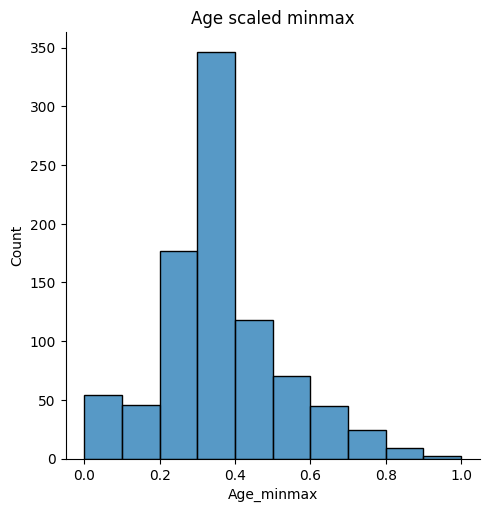

In [29]:
# Some graphs
sns.displot(data=data2, x='Age_minmax', bins=10).set(title='Age scaled minmax')
plt.show()

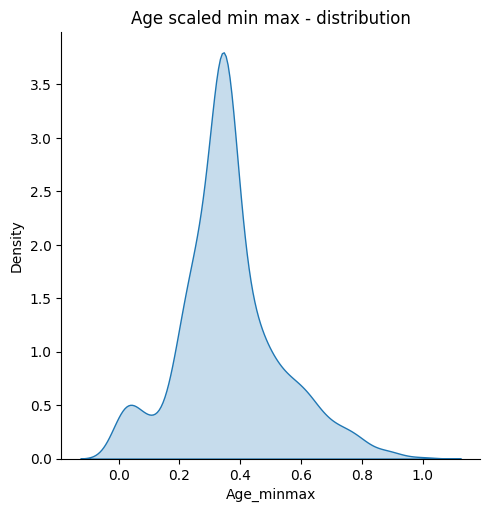

In [30]:
sns.displot(data=data2, x='Age_minmax', kind='kde', fill=True).set(title='Age scaled min max - distribution')
plt.show()

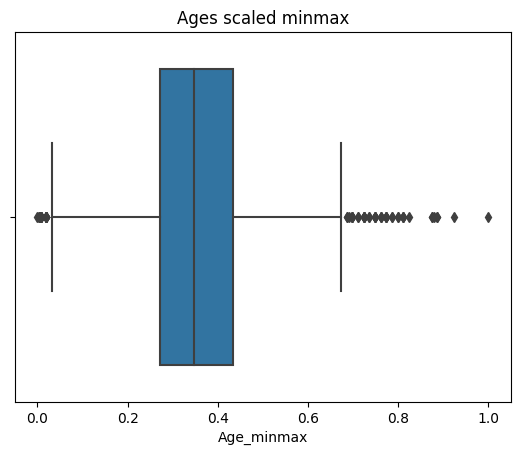

In [31]:
sns.boxplot(data=data2, x='Age_minmax').set(title='Ages scaled minmax')
plt.show()

In [32]:
# Now, standard scaling
standard_scaler = StandardScaler()
standard_scaler.fit(data2['Age'].values.reshape(-1, 1))
standard_scaler

StandardScaler()

In [33]:
data2['Age_stdscaled'] = standard_scaler.transform(data2['Age'].values.reshape(-1, 1))
data2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_minmax,Age_stdscaled
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.271174,-0.565736
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.472229,0.663861
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.321438,-0.258337
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.434531,0.433312
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.434531,0.433312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.334004,-0.181487
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0.233476,-0.796286
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,0.346569,-0.104637
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0.321438,-0.258337


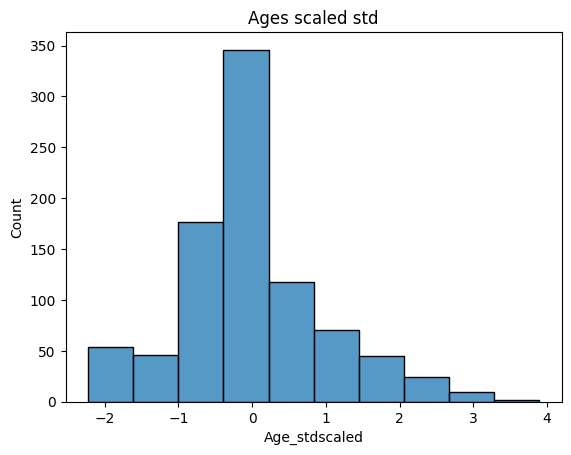

In [34]:
#Some graphs
sns.histplot(data=data2, x='Age_stdscaled', bins=10).set(title='Ages scaled std')
plt.show()

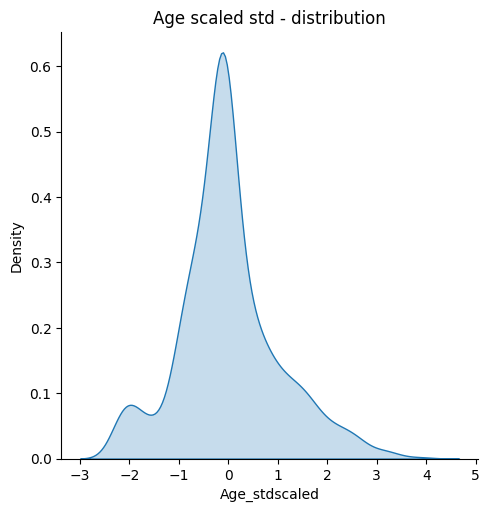

In [35]:
sns.displot(data=data2, x='Age_stdscaled', kind='kde', fill=True).set(title='Age scaled std - distribution')
plt.show()

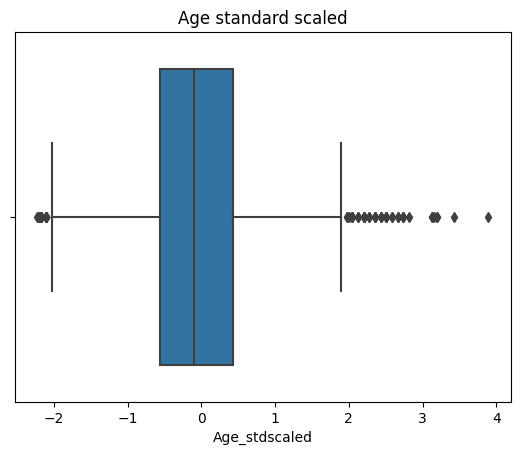

In [36]:
sns.boxplot(data=data2, x='Age_stdscaled').set(title='Age standard scaled')
plt.show()

---
## 3. Categorical Encoding

### One-Hot Encoding

In [37]:
data3 = titanic.copy()

In [38]:
data3['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [39]:
# Create an auxiliar dataframe with the enconded rows (to make a join after)
data3_oh = pd.get_dummies(data3['Sex'])
data3_oh.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [40]:
data3 = data3.join(data3_oh)
data3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


We can see that we only need 1 of the 2 dummy variables to represent the original categorical variable `Sex`. Any of the 2 will do the job, and it doesn't matter which one we select, since they are equivalent. Therefore, to encode a categorical variable with 2 labels, we need only 1 dummy variable.

To extend this concept, to encode categorical variable with k labels, we need k-1 dummy variables. We can achieve this task as follows:

**TODO:** Obtaining k-1 labels on __Sex__ and __Embarked__ features

In [41]:
data3[['Sex','male','female']].head()

,Sex,male,female
0,male,1,0
1,female,0,1
2,female,0,1
3,female,0,1
4,male,1,0


In [42]:
# We keep "male" column (male=1 female=0)
data3.drop(columns=['Sex','female'], inplace=True)
data3

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,1


In [43]:
# Rename column
data3.rename(columns={'male':'Sex'}, inplace=True)
data3

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,1


In [44]:
# New dataframe to label embarked
data4 = data3.copy()
data4_temp = pd.get_dummies(data4['Embarked'])
data4_temp

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [45]:
data4 = data4.join(data4_temp)
data4

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,1,1,0,0


In [46]:
data4.drop(columns=['Embarked'], inplace=True)
data4

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,1,1,0,0


In [47]:
data4.rename(columns={'C':'Embarked_C', 'Q':'Embarked_Q', 'S':'Embarked_S'}, inplace=True)
data4

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,1,1,0,0


**TODO:** Investigate Scikt-Learn API [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

In [48]:
# Testing one-hot encoding, and its hability to manage missing values 
# with the titanic age missing values
# Lets test with embarked, that has 2 missing values. We will set them to S, which is the most common port

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Encode values of embarked as integers

embarked = np.array(titanic["Embarked"])
label_encoder2 = LabelEncoder()
embarked_encoded = label_encoder2.fit_transform(embarked)

"""
Interesting!  The missing values take the highest encoded value (S, C , Q = 0, 1, 2...missing=3!!!)
"""



'\nInteresting!  The missing values take the highest encoded value (S, C , Q = 0, 1, 2...missing=3!!!)\n'

---
## 4 Transformations

In [49]:
data4 = pd.read_csv('titanic.csv', usecols=['Age', 'Fare', 'Survived'])
data4.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [50]:
data4['Age'] = data4['Age'].fillna(data4.Age.median())
data4.isna().sum()

Survived    0
Age         0
Fare        0
dtype: int64

### Example: Logarithmic transformation

In [51]:
data4['Age_log'] = np.log(data4.Age)

In [52]:
data4

,Survived,Age,Fare,Age_log
0,0,22.0,7.2500,3.091042
1,1,38.0,71.2833,3.637586
2,1,26.0,7.9250,3.258097
3,1,35.0,53.1000,3.555348
4,0,35.0,8.0500,3.555348
...,...,...,...,...
886,0,27.0,13.0000,3.295837
887,1,19.0,30.0000,2.944439
888,0,28.0,23.4500,3.332205
889,1,26.0,30.0000,3.258097


**TODO:** Convert Age to months

---
## 5. Discretization

**TODO:** Apply binning to __Age__ and plot Age count per bin

---
## 6. Outliers

**TODO:** Load the numerical variables of the Titanic Dataset

**TODO:** We can see that `Age` and `Fare` are continuous variables. So, you'll need to limit outliers on those variables.

**TODO:** Plot histograms on __Age__ and __Fare__

**TODO:** __Age__ is quite Gaussian and __Fare__ is skewed, so you will use the Gaussian assumption for __Age__, and the interquantile range for __Fare__.

### Find outliers

---
## 7. Optional: Date and Time

In some machine learning problems, temporary features appear, such as dates, times, etc. That type of data must be treated in a particular way.

**NOTE:** There is an area of machine learning where time data becomes critical, time series.

In [ ]:
#!gdown "1FFgCIxCy-DLV_mlzyFk_RolEgcr8IDNQ"

data7 = pd.read_csv('stock_prices.csv')
data7.head()

Downloading...
From: https://drive.google.com/uc?id=1FFgCIxCy-DLV_mlzyFk_RolEgcr8IDNQ
To: /content/stock_prices.csv
100% 20.5k/20.5k [00:00<00:00, 69.2MB/s]


,Date,Close Price,High Price,Low Price,Open Price,Volume
0,2021-12-10 05AM,48246.57,48359.35,48051.08,48170.66,827.39761
1,2021-12-10 06AM,47847.59,48430.00,47810.81,48249.78,1296.18883
2,2021-12-10 07AM,47694.62,48037.48,47550.00,47847.59,2299.85298
3,2021-12-10 08AM,48090.35,48169.06,47587.39,47694.62,1371.25447
4,2021-12-10 09AM,48366.37,48495.00,47869.80,48090.35,1232.30238


**TODO:** Parse the dates, currently coded as strings, into datetime.

**TIP:** Investigate pandas [to_datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) and take care of date format!

**TODO:** Extract Month from Date

**TODO:** Convert Day to numeric from 1-31

**TODO:** Convert Day of the week to numeric from 0 to 6

**TODO:** Convert Day of the week to name

**TODO:** Was on Weekend? Generate a binary feature that indicates if the date corresponds to a weekend day.

**TODO:** Extract year

**TODO:** Extract hour